In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv("gold_price_data.csv")

In [3]:
df.head()

,Date,Value
0,1970-01-01,35.2
1,1970-04-01,35.1
2,1970-07-01,35.4
3,1970-10-01,36.2
4,1971-01-01,37.4


In [4]:
df.tail()

,Date,Value
10782,2020-03-09,1672.50
10783,2020-03-10,1655.70
10784,2020-03-11,1653.75
10785,2020-03-12,1570.70
10786,2020-03-13,1562.80


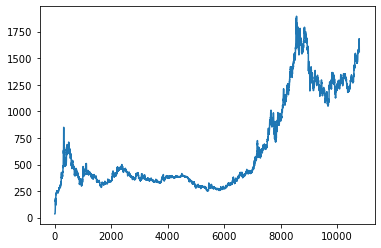

In [5]:
plt.figure(figsize=(6,4))
plt.plot(df["Value"])
plt.show()

In [6]:
result = seasonal_decompose(x=df["Value"], model ="multiplicative", period=4) 

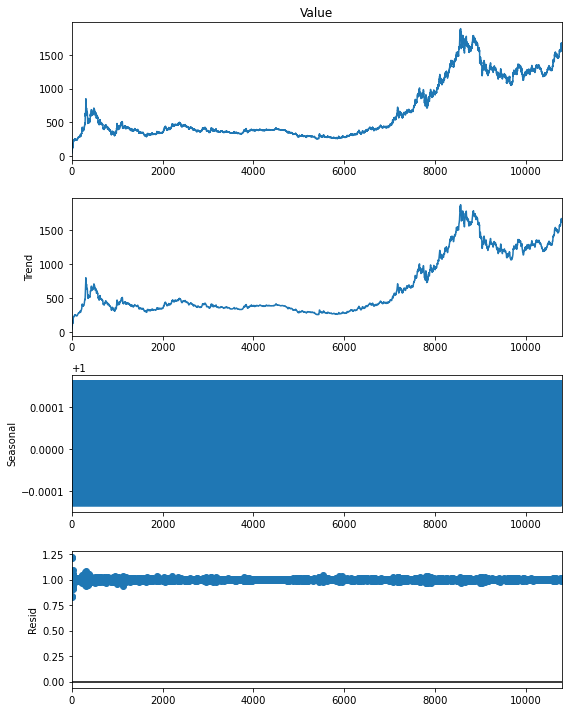

In [7]:
plt.rcParams.update({'figure.figsize': (8,10)})
result.plot()
plt.show()

There is Trend and Possible Sesonality we want to remove seasonality 

In [8]:
difference = df["Value"] - df["Value"].shift(4)

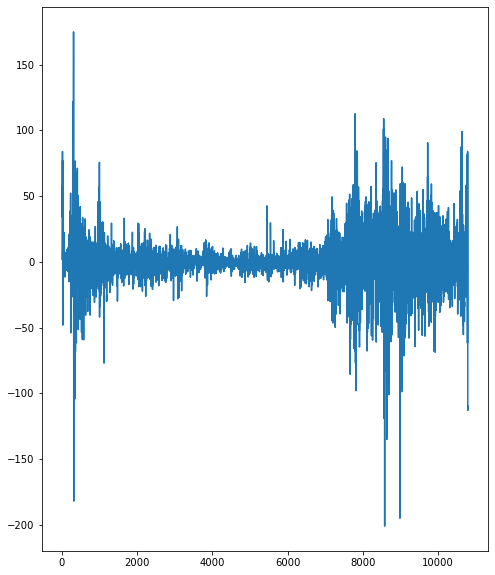

In [9]:
plt.plot(difference.dropna())

In [10]:
seasonal_difference = df["Value"] - df["Value"].shift(12)

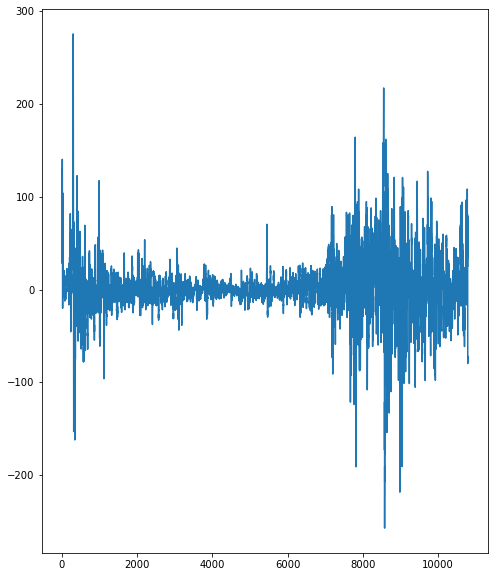

In [11]:
plt.plot(seasonal_difference.dropna())

In [12]:
double_difference = seasonal_difference - seasonal_difference.shift(1)

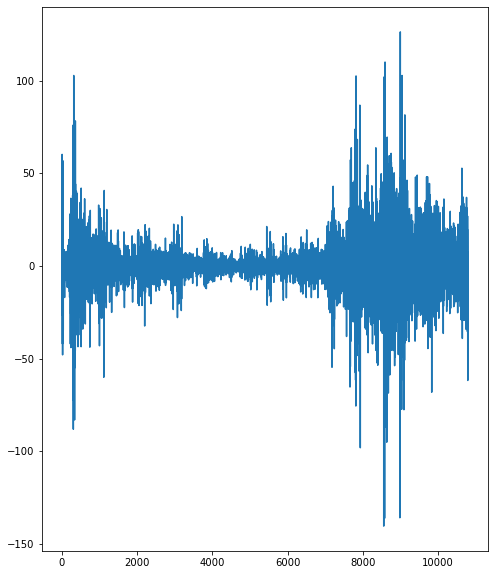

In [13]:
plt.plot(double_difference.dropna())

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

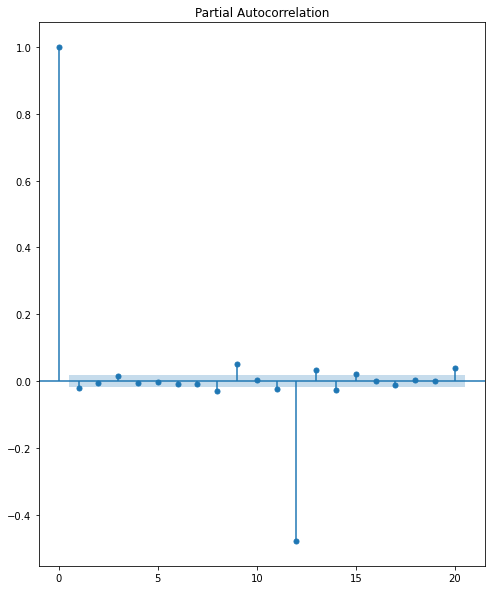

In [15]:
plot_pacf(double_difference.dropna(), lags=20)
plt.show()

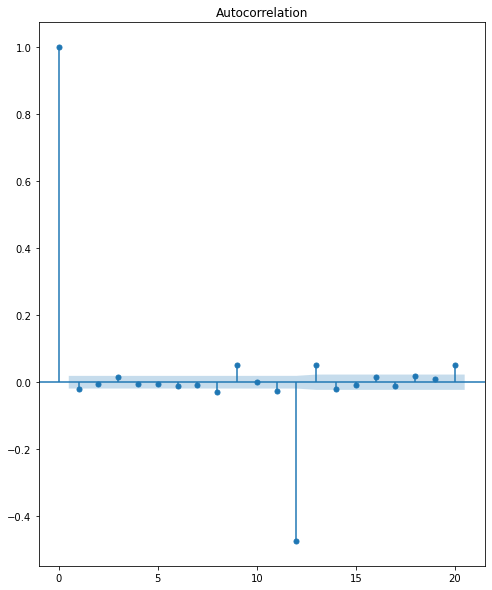

In [16]:
plot_acf(double_difference.dropna(), lags=20)
plt.show()

In [17]:
df["Value"].shape

(10787,)

# Implementation of ARIMA

## ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a generalization of the simpler AutoRegressive Moving Average and adds the notion of integration

In [18]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [19]:
model=ARIMA(df["Value"],order=(1,2,1))
model=model.fit()

In [20]:
df["forecast"] = model.predict(start=7550, end=10786)

In [21]:
df.tail()

,Date,Value,forecast
10782,2020-03-09,1672.50,-24.109570
10783,2020-03-10,1655.70,11.522923
10784,2020-03-11,1653.75,17.240928
10785,2020-03-12,1570.70,2.207836
10786,2020-03-13,1562.80,84.298915


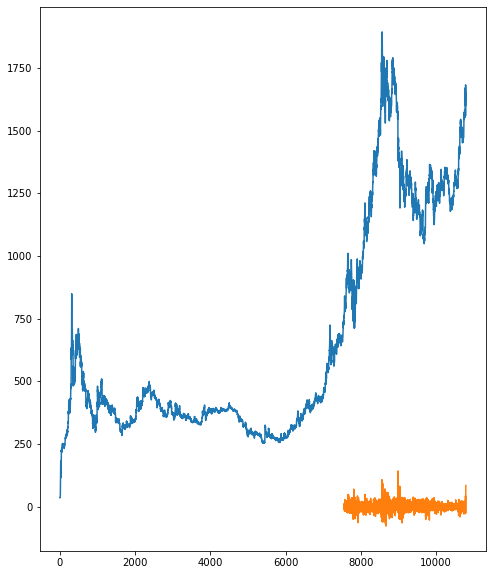

In [22]:
plt.figure()
plt.plot(df[["Value","forecast"]])
plt.show()

here you can see prediction is not good so we try to make good prediction using SARIMAX model

# SARIMAX

In [23]:
import statsmodels.api as sm

In [24]:
model = sm.tsa.statespace.SARIMAX(df['Value'],order=(1, 2, 1),seasonal_order=(1,2,1,4), trend="t")
model = model.fit()

In [25]:
df['forecast2']=model.predict(start=7550,end=10786)

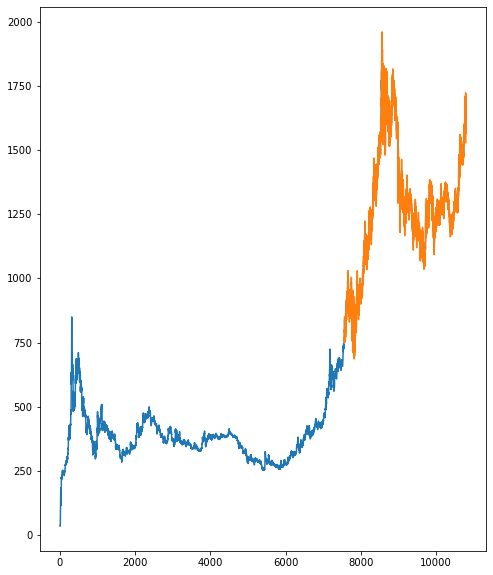

In [26]:
plt.figure()
plt.plot(df[["Value","forecast2"]])
plt.show()

#simple ANN

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN, LSTM

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error

import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

In [28]:
df = pd.read_csv("gold_price_data.csv")

In [29]:
df.shape

(10787, 2)

In [30]:
train = df["Value"][:7550]
test = df["Value"][7550:]

In [31]:
train.shape

(7550,)

In [32]:
test.shape

(3237,)

In [33]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(np.array(train).reshape(-1,1))
test_scaled = scaler.transform(np.array(test).reshape(-1,1))

In [34]:
#convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        sample = dataset[i:(i+time_step), 0]    
        X.append(sample)
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

In [35]:
time_step = 50
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)

In [36]:
print(X_train.shape)
print(X_test.shape)

(7499, 50)
(3186, 50)


In [37]:
# reshape into (samples, time steps, features) 
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test  = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [38]:
print(X_train.shape)
print(X_test.shape)

(7499, 50, 1)
(3186, 50, 1)


In [39]:
model = Sequential()
model.add(SimpleRNN(32, return_sequences=True, input_shape=(time_step,1)))
model.add(SimpleRNN(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [40]:
model.fit(X_train,y_train, epochs=20, batch_size=32)

Epoch 1/20
235/235 [==============================] - 5s 15ms/step - loss: 0.0040
Epoch 2/20
235/235 [==============================] - 3s 13ms/step - loss: 1.7341e-04
Epoch 3/20
235/235 [==============================] - 3s 13ms/step - loss: 1.3838e-04
Epoch 4/20
235/235 [==============================] - 3s 14ms/step - loss: 1.2086e-04
Epoch 5/20
235/235 [==============================] - 3s 12ms/step - loss: 1.0499e-04
Epoch 6/20
235/235 [==============================] - 3s 14ms/step - loss: 1.0275e-04
Epoch 7/20
235/235 [==============================] - 3s 13ms/step - loss: 9.5803e-05
Epoch 8/20
235/235 [==============================] - 3s 13ms/step - loss: 9.9652e-05
Epoch 9/20
235/235 [==============================] - 3s 13ms/step - loss: 8.8190e-05
Epoch 10/20
235/235 [==============================] - 3s 14ms/step - loss: 9.6903e-05
Epoch 11/20
235/235 [==============================] - 3s 14ms/step - loss: 8.7371e-05
Epoch 12/20
235/235 [==============================] - 3

In [41]:
y_pred = model.predict(X_test)
mean_squared_error(y_test,y_pred)

0.023601914835312054

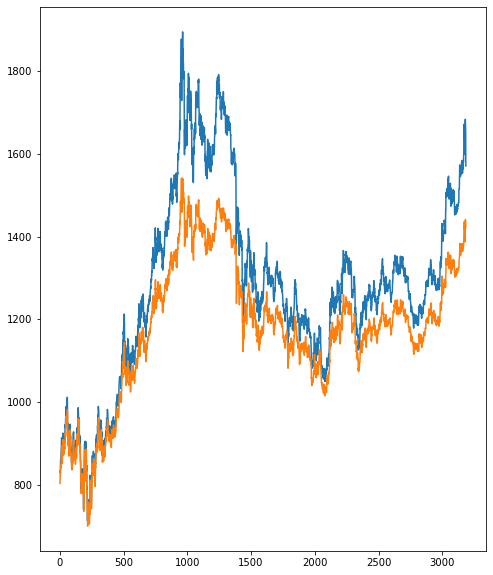

In [42]:
plt.figure()
plt.plot(scaler.inverse_transform(np.array(y_test).reshape(-1,1)))
plt.plot(scaler.inverse_transform(y_pred))
plt.show()

# Lstm

In [43]:
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=(time_step,1)))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [44]:
model.fit(X_train,y_train, epochs=50, batch_size=32)

Epoch 1/50
235/235 [==============================] - 14s 39ms/step - loss: 0.0056
Epoch 2/50
235/235 [==============================] - 9s 39ms/step - loss: 4.3055e-04
Epoch 3/50
235/235 [==============================] - 12s 49ms/step - loss: 3.8653e-04
Epoch 4/50
235/235 [==============================] - 11s 45ms/step - loss: 3.0674e-04
Epoch 5/50
235/235 [==============================] - 9s 37ms/step - loss: 2.7207e-04
Epoch 6/50
235/235 [==============================] - 10s 43ms/step - loss: 2.4524e-04
Epoch 7/50
235/235 [==============================] - 10s 41ms/step - loss: 2.1201e-04
Epoch 8/50
235/235 [==============================] - 11s 49ms/step - loss: 1.9286e-04
Epoch 9/50
235/235 [==============================] - 13s 54ms/step - loss: 1.6556e-04
Epoch 10/50
235/235 [==============================] - 10s 42ms/step - loss: 1.5978e-04
Epoch 11/50
235/235 [==============================] - 10s 42ms/step - loss: 1.1866e-04
Epoch 12/50
235/235 [==========================

In [45]:
y_pred = model.predict(X_test)
mean_squared_error(y_test,y_pred)

0.034674674916339215

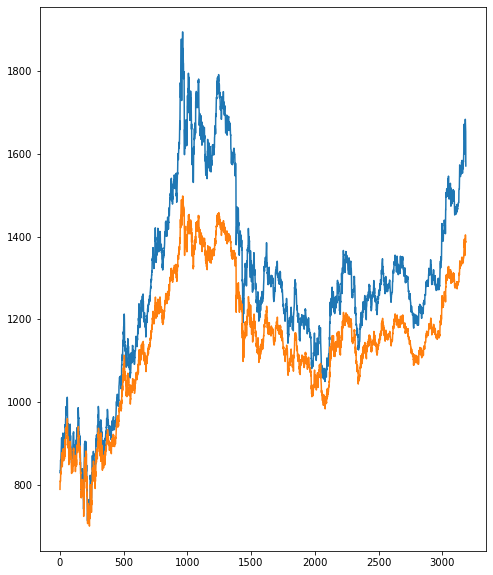

In [46]:
plt.figure()
plt.plot(scaler.inverse_transform(np.array(y_test).reshape(-1,1)))
plt.plot(scaler.inverse_transform(y_pred))
plt.show()

In [47]:
# next 50 days

days = 50
last_input = X_test[-1]
last_output = y_pred[-1]
y_forecast = []

for i in range(1,days+1):
    last_input = np.append(last_input[1:], last_output)
    last_output = model.predict(last_input.reshape(1,50,1))
    y_forecast.append(last_output[0][0])

In [48]:
all_predictions = np.append(y_pred,y_forecast)

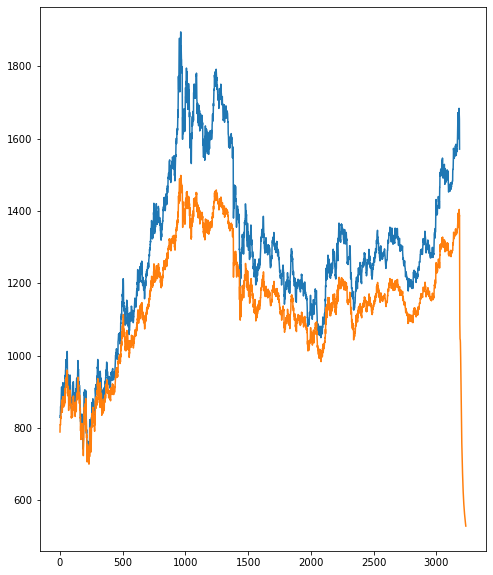

In [49]:
plt.figure()
plt.plot(scaler.inverse_transform(np.array(y_test).reshape(-1,1)))
plt.plot(scaler.inverse_transform(all_predictions.reshape(-1,1)))
plt.show()